In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
n = 100             # dimision
eta = 0.3             # eta
iters = 100000  # number of iterations
lim = 200       # the set is [-lim, lim]^n

# construction of f
A = np.zeros((n,n))
b = np.ones(n)/4
h = np.zeros(n)
h[n-1] = 1/4
for i in range(n):
    for j in range(n):
      if (i + j == n-1):
          A[i][j] = 1
          if (j >= 1):
            A[i][j-1] = -1
A = 1/4*A
H = 2*np.dot(A.T, A)

def F(x,y):
    return - np.dot(np.dot(A,x) -b ,y)

def DynamicReg(x,y):
    c = np.dot(A,x) -b
    sum = 0
    for i in range(n):
        if (c[i]<=0):
            sum = sum - c[i]*(lim-y[i])
        else:
            sum = sum - c[i]*(-lim-y[i])
    return sum

def Fx(x,y):
    return np.dot(H,x)-h-np.dot(A,y) 

def Fy(x,y):
    return -(-np.dot(A.T, x) + b)

def norm(x):
    sum = 0
    for k in range(n):
      sum += x[k]*x[k]
    return sum

def tan_residual(Fx1,Fy1,x,y):
    return norm(Fx1) + norm(Fy1)

def proj(x):
    for k in range(n):
        if (x[k] > lim):
            print(1)
            x[k] = lim
        if (x[k] < -lim):
            print(1)
            x[k] = -lim
    return x

def OG_run():
  x = np.zeros((iters, n))
  y = np.zeros((iters, n))
  x[0] = y[0] = np.ones(n)/n 
  tan = np.zeros(iters)
  reg = np.zeros(iters)
  x_h = proj(x[0] - eta*Fx(x[0], y[0]))
  y_h = proj(y[0] - eta*Fy(x[0], y[0]))
  x[1] = proj(x_h - eta*Fx(x[0], y[0]))   
  y[1] = proj(y_h - eta*Fy(x[0], y[0]))           
  for i in range(iters):
      if (i <=1):
         continue
      x_h = proj(x_h - eta*Fx(x[i-1], y[i-1]) )
      y_h = proj(y_h - eta*Fy(x[i-1], y[i-1]) )
      x[i] = proj(x_h - eta*Fx(x[i-1], y[i-1]))   
      y[i] = proj(y_h - eta*Fy(x[i-1], y[i-1]))   
  for i in range(iters):
      tan[i] = np.sqrt(tan_residual(Fx(x[i],y[i]), Fy(x[i],y[i]), x[i], y[i]))
      if (i == 0):
          reg[i] = DynamicReg(x[i],y[i])
      else:
          reg[i] = reg[i-1] + DynamicReg(x[i],y[i])
  return tan,reg, x, y

def AOG_run():
  x = np.zeros((iters, n))
  y = np.zeros((iters, n))
  x[0] = y[0] = np.ones(n)/n 
  tan = np.zeros(iters)
  reg = np.zeros(iters)
  x_h = proj(x[0] - eta*Fx(x[0], y[0]))
  y_h = proj(y[0] - eta*Fy(x[0], y[0]))
  x[1] = proj(x_h - eta*Fx(x[0], y[0]) + 1/3*(x[0]-x_h))   
  y[1] = proj(y_h - eta*Fy(x[0], y[0]) + 1/3*(y[0]-y_h))           
  for i in range(iters):
      if (i <=1):
         continue
      x_h = proj(x_h - eta*Fx(x[i-1], y[i-1]) + 1/(i+1)*(x[0]- x_h))
      y_h = proj(y_h - eta*Fy(x[i-1], y[i-1]) + 1/(i+1)*(y[0]- y_h))
      x[i] = proj(x_h - eta*Fx(x[i-1], y[i-1])+ 1/(i+2)*(x[0]- x_h))   
      y[i] = proj(y_h - eta*Fy(x[i-1], y[i-1])+ 1/(i+2)*(y[0]- y_h))   
  for i in range(iters):
      tan[i] = np.sqrt(tan_residual(Fx(x[i],y[i]), Fy(x[i],y[i]), x[i], y[i]))
      if (i == 0):
          reg[i] = DynamicReg(x[i],y[i])
      else:
          reg[i] = reg[i-1] + DynamicReg(x[i],y[i])
  return tan, reg, x, y
tan, reg, x,y = AOG_run()
tan_og, reg_og, x, y = OG_run()

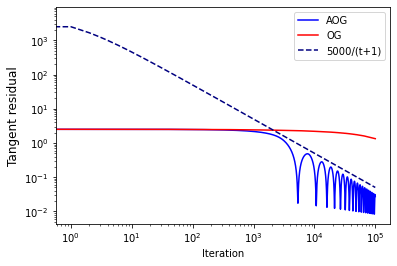

In [5]:
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iteration')
plt.ylabel('Tangent residual', fontsize='large')
plt.plot(range(iters)[0:iters-1], tan[0:iters-1], color='blue', label='AOG')
plt.plot(range(iters)[0:iters-1], tan_og[0:iters-1], color='red', label='OG')
plt.plot(range(iters)[0:iters-1], [5000/(i+1) for i in range(iters-1)], color='navy', linestyle='dashed', label='5000/(t+1)')
plt.legend()
plt.savefig("rate.pdf", format="pdf", bbox_inches="tight")
plt.show()





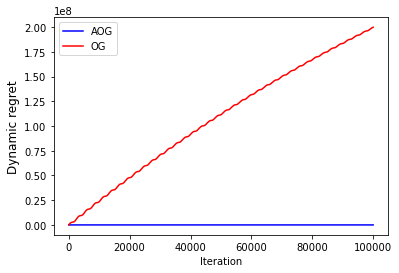

In [6]:
plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Dynamic regret',fontsize='large')
plt.plot(range(iters)[0:iters-1], reg[0:iters-1]/reg[0]/20, color='blue', label='AOG')
plt.plot(range(iters)[0:iters-1], reg_og[0:iters-1], color='red', label='OG')
plt.legend()
plt.savefig("regret.pdf", format="pdf", bbox_inches="tight")
plt.show() 